## Exportando base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [2]:
pd.read_csv('Obesity.csv')
df = pd.read_csv('Obesity.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Limpeza base


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [5]:
#renomeando as colunas do DataFrame
df.columns = ['genero', 'idade', 'altura', 'peso_kg', 'hist_familiar_excesso', 'consumo_calorico', 'consumo_vegetais',
       'numero_refeicoes', 'lanches_entre_refeicoes', 'fumante', 'consumo_agua_dia', 'monitora_calorias', 'atividade_fisica', 'tempo_eletronicos', 'consumo_alcool', 'tipo_transporte',
       'obesidade']

df.head()


,genero,idade,altura,peso_kg,hist_familiar_excesso,consumo_calorico,consumo_vegetais,numero_refeicoes,lanches_entre_refeicoes,fumante,consumo_agua_dia,monitora_calorias,atividade_fisica,tempo_eletronicos,consumo_alcool,tipo_transporte,obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   genero                   2111 non-null   object 
 1   idade                    2111 non-null   float64
 2   altura                   2111 non-null   float64
 3   peso_kg                  2111 non-null   float64
 4   hist_familiar_excesso    2111 non-null   object 
 5   consumo_calorico         2111 non-null   object 
 6   consumo_vegetais         2111 non-null   float64
 7   numero_refeicoes         2111 non-null   float64
 8   lanches_entre_refeicoes  2111 non-null   object 
 9   fumante                  2111 non-null   object 
 10  consumo_agua_dia         2111 non-null   float64
 11  monitora_calorias        2111 non-null   object 
 12  atividade_fisica         2111 non-null   float64
 13  tempo_eletronicos        2111 non-null   float64
 14  consumo_alcool          

In [ ]:
#  Aplicando as transformações

# Gênero
df['genero'] = df['genero'].map({'Female': 'Feminino', 'Male': 'Masculino'})

# Idade (arredonda e converte para int)
df['idade'] = df['idade'].round().astype(int)

# Colunas Binárias (sim/não)
map_bin = {'yes': 'sim', 'no': 'nao'}
for col in ['hist_familiar_excesso', 'consumo_calorico', 'fumante', 'monitora_calorias']:
    df[col] = df[col].map(map_bin)

# Consumo Vegetais (FCVC) - arredondar primeiro, depois mapear
df['consumo_vegetais'] = df['consumo_vegetais'].round().astype(int)
map_veg = {1: 'raramente', 2: 'as vezes', 3: 'sempre'}
df['consumo_vegetais'] = df['consumo_vegetais'].map(map_veg)

# Numero Refeições (NCP) - apenas arredondar
df['numero_refeicoes'] = df['numero_refeicoes'].round().astype(int)

# Lanches entre refeições (CAEC)
map_caec = {
    'no': 'nao consome',
    'Sometimes': 'as vezes',
    'Frequently': 'frequentemente',
    'Always': 'sempre'
}
df['lanches_entre_refeicoes'] = df['lanches_entre_refeicoes'].map(map_caec)

# Consumo Água (CH2O) - apenas arredondar
df['consumo_agua_dia'] = df['consumo_agua_dia'].round().astype(int)

# Atividade Física (FAF)
df['atividade_fisica'] = df['atividade_fisica'].round().astype(int)
map_faf = {
    0: 'nenhuma',
    1: '1 a 2x/sem',
    2: '3 a 4x/sem',
    3: '5x/sem ou mais'
}
df['atividade_fisica'] = df['atividade_fisica'].map(map_faf)

# Tempo Eletrônicos (TUE)
df['tempo_eletronicos'] = df['tempo_eletronicos'].round().astype(int)
map_tue = {
    0: '0 a 2h/dia',
    1: '3 a 5h/dia',
    2: '> 5h/dia'
}
df['tempo_eletronicos'] = df['tempo_eletronicos'].map(map_tue)

# Consumo Álcool (CALC)
map_calc = {
    'no': 'nao bebe',
    'Sometimes': 'as vezes',
    'Frequently': 'frequentemente',
    'Always': 'sempre'
}
df['consumo_alcool'] = df['consumo_alcool'].map(map_calc)

# Tipo Transporte (MTRANS)
map_trans = {
    'Automobile': 'carro',
    'Motorbike': 'moto',
    'Bike': 'bicicleta',
    'Public_Transportation': 'transporte publico',
    'Walking': 'a pe'
}
df['tipo_transporte'] = df['tipo_transporte'].map(map_trans)

# Obesidade (Target)
map_obesity = {
    'Insufficient_Weight': 'abaixo do peso',
    'Normal_Weight': 'peso normal',
    'Overweight_Level_I': 'sobrepeso I',
    'Overweight_Level_II': 'sobrepeso II',
    'Obesity_Type_I': 'obesidade I',
    'Obesity_Type_II': 'obesidade II',
    'Obesity_Type_III': 'obesidade III'
}
df['obesidade'] = df['obesidade'].map(map_obesity)

In [8]:
df.head()

,genero,idade,altura,peso_kg,hist_familiar_excesso,consumo_calorico,consumo_vegetais,numero_refeicoes,lanches_entre_refeicoes,fumante,consumo_agua_dia,monitora_calorias,atividade_fisica,tempo_eletronicos,consumo_alcool,tipo_transporte,obesidade
0,Feminino,21,1.62,64.0,sim,nao,as vezes,3,as vezes,nao,2,nao,nenhuma,3 a 5h/dia,nao bebe,transporte publico,peso normal
1,Feminino,21,1.52,56.0,sim,nao,sempre,3,as vezes,sim,3,sim,5x/sem ou mais,0 a 2h/dia,as vezes,transporte publico,peso normal
2,Masculino,23,1.80,77.0,sim,nao,as vezes,3,as vezes,nao,2,nao,3 a 4x/sem,3 a 5h/dia,frequentemente,transporte publico,peso normal
3,Masculino,27,1.80,87.0,nao,nao,sempre,3,as vezes,nao,2,nao,3 a 4x/sem,0 a 2h/dia,frequentemente,a pe,sobrepeso I
4,Masculino,22,1.78,89.8,nao,nao,as vezes,1,as vezes,nao,2,nao,nenhuma,0 a 2h/dia,as vezes,transporte publico,sobrepeso II


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   genero                   2111 non-null   object 
 1   idade                    2111 non-null   int64  
 2   altura                   2111 non-null   float64
 3   peso_kg                  2111 non-null   float64
 4   hist_familiar_excesso    2111 non-null   object 
 5   consumo_calorico         2111 non-null   object 
 6   consumo_vegetais         2111 non-null   object 
 7   numero_refeicoes         2111 non-null   int64  
 8   lanches_entre_refeicoes  2111 non-null   object 
 9   fumante                  2111 non-null   object 
 10  consumo_agua_dia         2111 non-null   int64  
 11  monitora_calorias        2111 non-null   object 
 12  atividade_fisica         2111 non-null   object 
 13  tempo_eletronicos        2111 non-null   object 
 14  consumo_alcool          

## Salvando base limpa

In [10]:
df.to_csv('Obesity_clean.csv', index=False)

## Iniciando Modelo

In [ ]:
#  Separação de Variáveis
X = df.drop('obesidade', axis=1)
y = df['obesidade']

In [ ]:
# Definição das colunas 

# Colunas numéricas 
numeric_features = ['idade', 'altura', 'peso_kg', 'numero_refeicoes', 'consumo_agua_dia']

# Colunas categóricas
categorical_features = ['genero', 'hist_familiar_excesso', 'consumo_calorico', 
                        'consumo_vegetais', 'lanches_entre_refeicoes', 'fumante', 
                        'monitora_calorias', 'atividade_fisica', 'tempo_eletronicos', 
                        'consumo_alcool', 'tipo_transporte']


In [ ]:
# Pipeline de Pré-processamento

# Para as categóricas, usei OneHotEncoder para transformar texto em números binários
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        # Numéricas passam direto ou poderiam ser normalizadas (pass='passthrough')
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Pipeline Completa
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(n_estimators=100, random_state=89))
# ])


# Atualizando com parâmetros anti-overfitting
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', RandomForestClassifier(
        n_estimators=200,       # Aumenta o número de árvores
        max_depth=10,           # LIMITA a profundidade (evita decorar)
        min_samples_split=5,    # Mínimo de amostras para dividir um nó (evita regras muito específicas)
        min_samples_leaf=4,     # Mínimo de amostras em uma folha (exige grupos maiores para decisão)
        max_features='sqrt',    # Usa apenas parte das colunas para cada árvore (aumenta a aleatoriedade)
        random_state=89
    ))
])



In [ ]:
# Transformando Coluna Target em numerico
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Divisão Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [17]:
print(f"\n--- Divisão dos Dados ---")
print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")


--- Divisão dos Dados ---
Tamanho do conjunto de treino (X_train): (1688, 16)
Tamanho do conjunto de teste (X_test): (423, 16)


In [ ]:
# Retorna os nomes originais - para visualização
nomes_treino = label_encoder.inverse_transform(y_train)
nomes_teste = label_encoder.inverse_transform(y_test)

print("\nDistribuição da variável target (treino):")
print(pd.Series(nomes_treino).value_counts(normalize=True))

print("\nDistribuição da variável target (teste):")
print(pd.Series(nomes_teste).value_counts(normalize=True))


Distribuição da variável target (treino):
obesidade I       0.161730
obesidade III     0.154621
sobrepeso II      0.142180
obesidade II      0.141588
sobrepeso I       0.138626
peso normal       0.133294
abaixo do peso    0.127962
Name: proportion, dtype: float64

Distribuição da variável target (teste):
obesidade I       0.184397
obesidade III     0.148936
peso normal       0.146572
obesidade II      0.137116
abaixo do peso    0.132388
sobrepeso I       0.132388
sobrepeso II      0.118203
Name: proportion, dtype: float64


In [ ]:
# Treinamento do modelo
print("Treinando o modelo...")
pipeline.fit(X_train, y_train)

Treinando o modelo...


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('modelo', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [20]:
# --- PREVISÃO DO MODELO ---

#pedindo para o modelo prever os valores de treino
y_train_pred = pipeline.predict(X_train)

#pedindo para o modelo prever os valores de teste
y_pred = pipeline.predict(X_test)


In [21]:
print("\n--- ACURÁCIA DO MODELO ---")

#pedindo para o modelo calcular a acurácia do treino
accuracy_train = accuracy_score(y_train, y_train_pred) 

#pedindo para o modelo calcular a acurácia do treino
accuracy_test = accuracy_score(y_test, y_pred)


print(f"Acurácia no conjunto de treino: {accuracy_train:.2f}") 
print(f"Acurácia no conjunto de teste: {accuracy_test:.2f}")


--- ACURÁCIA DO MODELO ---
Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.92


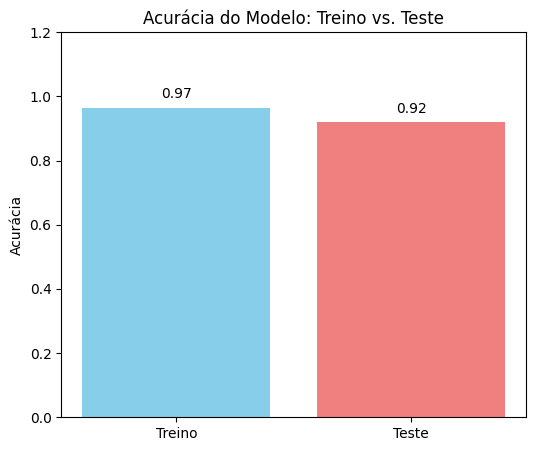

In [22]:
# --- GRAFICO DE ACURACIA DO MODELO ---

# Cria um DataFrame para facilitar a plotagem da acuracia
accuracy_data = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'Acuracia': [accuracy_train, accuracy_test]
})

# Cria o gráfico de barras
plt.figure(figsize=(6, 5)) # Define o tamanho da figura
plt.bar(accuracy_data['Conjunto'], accuracy_data['Acuracia'], color=['skyblue', 'lightcoral'])

# # Define o limite do eixo Y de 0 a 1, já que é uma acurácia
plt.ylim(0, 1.2)

# Adiciona rótulos e título
plt.ylabel('Acurácia')
plt.title('Acurácia do Modelo: Treino vs. Teste')

# # Adiciona uma grade no eixo Y para melhor leitura
# plt.grid(axis='y', linestyle='--')

# Adiciona os valores de acurácia no topo das barras
for index, value in enumerate(accuracy_data['Acuracia']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom')


plt.show()

In [23]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                precision    recall  f1-score   support

abaixo do peso       0.93      0.95      0.94        56
   obesidade I       0.96      0.91      0.93        78
  obesidade II       0.93      0.98      0.96        58
 obesidade III       1.00      1.00      1.00        63
   peso normal       0.81      0.87      0.84        62
   sobrepeso I       0.88      0.82      0.85        56
  sobrepeso II       0.92      0.90      0.91        50

      accuracy                           0.92       423
     macro avg       0.92      0.92      0.92       423
  weighted avg       0.92      0.92      0.92       423



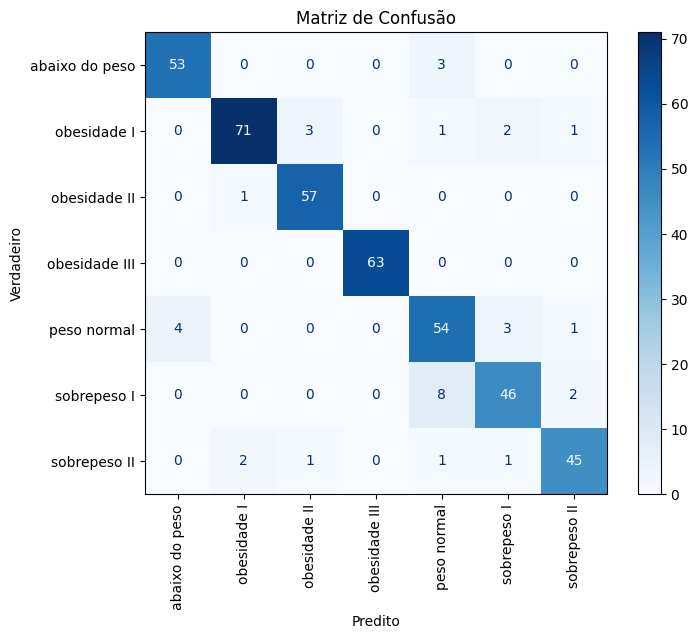

In [24]:
# Calcular a matriz de confusão
# (Isso compara o Gabarito 'y_test' com as Respostas do Aluno 'y_pred')
cm = confusion_matrix(y_test, y_pred)

# Configurar o tamanho da figura (para caberem todos os nomes)
fig, ax = plt.subplots(figsize=(8, 6))

# Criar a visualização
# IMPORTANTE: Usamos 'label_encoder.classes_' para ver os nomes ("Obesidade I") e não números (0, 1, 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plotar
# xticks_rotation='vertical': Deixa os nomes em pé para facilitar a leitura
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')

plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

## Salvando o Modelo

In [25]:
joblib.dump(pipeline, 'modelo_obesidade.pkl')
joblib.dump(label_encoder, 'encoder_target.pkl')

['encoder_target.pkl']